In [52]:
import numpy as np
import pandas as pd
import pandas_datareader.data as wb
import matplotlib.pyplot as plt

#list of stocks
stocks = ["AAPL", "MSFT", "AMZN", "GOOG"]
#download data from web
data = wb.DataReader (stocks, data_source="yahoo", start = "2010-1-1")["Adj Close"]

#convert daily price to returns
returns = np.log(data / data.shift(1))
mean_daily_returns = returns.mean()

In [53]:
cov_matrix = returns.cov()

#set number of runs
num_portfolios = 1500

#set up array to hold results
#We have increased the size of the array to hold the weight values for each stock
results = np.zeros((4+len(stocks)-1,num_portfolios))

for i in range(num_portfolios):
    weights = np.random.random(len(stocks))
    weights /= np.sum(weights)
    
    portfolio_return = np.sum(weights * mean_daily_returns) * 252
    portfolio_volatilities = np.sqrt(np.dot(weights.T,np.dot(cov_matrix, weights))) * np.sqrt(252)
    
    #store results in array
    results[0, i] = portfolio_return
    results[1, i] = portfolio_volatilities
    #Sharpe ratio = returns/volatility
    results[2, i] = results [0,i] / results [1, i]
    
    #iterate through the weight vector and add data to results array
    for j in range(len(weights)):
        results[j+3, i] = weights[j]

In [54]:
#convert results array to DataFrame
results_frame = pd.DataFrame(results.T, columns=['return', "volatility", "sharpe", stocks[0], stocks[1], stocks[2], stocks[3]])

## Důležité body analýzy 

In [55]:
max_sharpe_port = results_frame.iloc[results_frame["sharpe"].idxmax()]
min_vol_port = results_frame.iloc[results_frame["volatility"].idxmin()]
max_sharpe_port

return        0.225475
volatility    0.213374
sharpe        1.056714
AAPL          0.505983
MSFT          0.348955
AMZN          0.011583
GOOG          0.133479
Name: 223, dtype: float64

## Graf s vyznačenými důležitými body

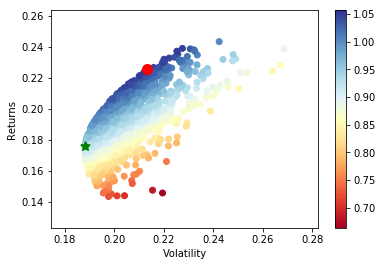

In [66]:
plt.scatter(results_frame["volatility"],results_frame["return"],c=results_frame.sharpe,cmap='RdYlBu')
plt.xlabel('Volatility')
plt.ylabel('Returns')
plt.colorbar()
#plot red star to highlight position of portfolio with highest Sharpe Ratio
plt.scatter(max_sharpe_port[1],max_sharpe_port[0],marker=(1,3,0),color='r',s=100)
#plot green star to highlight position of minimum variance portfolio
plt.scatter(min_vol_port[1],min_vol_port[0],marker=(5,1,0),color='g',s=100)
plt.show()